<a href="https://colab.research.google.com/github/Rushikesh175/Dhoni-Prediction-System/blob/main/Dhoni_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
ipl = pd.read_csv('ipl_dataset.csv')
ipl.head()


,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [3]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data.head()


,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [4]:
ipl= ipl.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat'],axis = 1)
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player',how='left')
new_ipl.drop(['wicket_type', 'player_dismissed'],axis=1,inplace=True)
new_ipl.columns


Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'run', 'wickets', 'truns', 'y', 'Team',
       'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets',
       'Catches Taken', 'Stumpings Made'],
      dtype='object')

In [10]:
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna('.')


In [13]:
a1 = new_ipl['venue'].unique()
a2 = new_ipl['batting_team'].unique()
a3 = new_ipl['bowling_team'].unique()
a4 = new_ipl['striker'].unique()
a5 = new_ipl['bowler'].unique()

def labelEncoding(data):
	dataset = pd.DataFrame(new_ipl)
	feature_dict ={}
	
	for feature in dataset:
		if dataset[feature].dtype==object:
			le = preprocessing.LabelEncoder()
			fs = dataset[feature].unique()
			le.fit(fs)
			dataset[feature] = le.transform(dataset[feature])
			feature_dict[feature] = le
			
	return dataset

labelEncoding(new_ipl)


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,9,1,0.1,4,7,91,14,80,1.0,0.0,...,1,1,1,1,1,1,1,1,NaN,NaN
1,9,1,0.2,4,7,14,90,80,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,9,1,0.2,4,7,14,90,80,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,9,1,0.2,4,7,14,90,80,0.0,0.0,...,0,0,0,0,0,0,0,0,8.0,0.0
4,9,1,0.3,4,7,14,90,80,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13251,5,1,1.2,5,4,86,99,11,1.0,1.0,...,0,0,0,0,0,0,0,0,7.0,0.0
13252,5,1,1.2,5,4,86,99,11,1.0,1.0,...,0,0,0,0,0,0,0,0,12.0,0.0
13253,5,1,1.2,5,4,86,99,11,1.0,1.0,...,0,0,0,0,0,0,0,0,5.0,0.0
13254,5,1,1.3,5,4,100,85,11,1.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [14]:
ip_dataset = new_ipl[['venue','innings', 'batting_team',
					'bowling_team', 'striker', 'non_striker',
					'bowler']]

b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)

features={}

for i in range(len(a1)):
	features[a1[i]]=b1[i]
for i in range(len(a2)):
	features[a2[i]]=b2[i]
for i in range(len(a3)):
	features[a3[i]]=b3[i]
for i in range(len(a4)):
	features[a4[i]]=b4[i]
for i in range(len(a5)):
	features[a5[i]]=b5[i]
	
features


{'A Chopra': 0,
 'A Flintoff': 0,
 'A Kumble': 1,
 'A Mishra': 2,
 'A Mithun': 3,
 'A Nehra': 4,
 'A Singh': 5,
 'A Symonds': 6,
 'A Uniyal': 7,
 'AA Bilakhia': 2,
 'AA Jhunjhunwala': 8,
 'AA Noffke': 9,
 'AB Agarkar': 10,
 'AB Dinda': 11,
 'AB McDonald': 12,
 'AB de Villiers': 4,
 'AC Gilchrist': 5,
 'AC Voges': 13,
 'AD Mascarenhas': 14,
 'AD Mathews': 15,
 'AG Paunikar': 7,
 'AM Nayar': 8,
 'AM Rahane': 9,
 'AM Salvi': 16,
 'AN Ahmed': 17,
 'AN Ghosh': 10,
 'AP Dole': 18,
 'AP Tare': 11,
 'AT Rayudu': 12,
 'Anureet Singh': 19,
 'B Akhil': 20,
 'B Chipli': 13,
 'B Geeves': 21,
 'B Lee': 22,
 'BAW Mendis': 23,
 'BB McCullum': 14,
 'BJ Hodge': 24,
 'Barabati Stadium': 0,
 'Bipul Sharma': 25,
 'Brabourne Stadium': 1,
 'Buffalo Park': 2,
 'C Madan': 16,
 'CA Pujara': 17,
 'CH Gayle': 26,
 'CK Langeveldt': 27,
 'CL White': 19,
 'CRD Fernando': 28,
 'Chennai Super Kings': 0,
 'D du Preez': 29,
 'DA Warner': 20,
 'DB Das': 21,
 'DE Bollinger': 30,
 'DJ Bravo': 31,
 'DJ Hussey': 32,
 'DJ Tho

In [15]:
X = new_ipl[['venue', 'innings','batting_team',
			'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [26]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [29]:
 early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min')
 model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
278/278 [==============================] - 1s 2ms/step - loss: 336.0887 - val_loss: 164.0792
Epoch 2/400
278/278 [==============================] - 1s 3ms/step - loss: 325.9854 - val_loss: 166.5147
Epoch 3/400
278/278 [==============================] - 1s 3ms/step - loss: 320.9377 - val_loss: 164.3057
Epoch 4/400
278/278 [==============================] - 1s 2ms/step - loss: 326.5728 - val_loss: 157.8727
Epoch 5/400
278/278 [==============================] - 1s 3ms/step - loss: 322.6061 - val_loss: 158.0101
Epoch 6/400
278/278 [==============================] - 1s 2ms/step - loss: 312.9842 - val_loss: 163.7845
Epoch 7/400
278/278 [==============================] - 1s 2ms/step - loss: 312.7042 - val_loss: 165.8701
Epoch 8/400
278/278 [==============================] - 1s 2ms/step - loss: 308.7973 - val_loss: 162.9263
Epoch 9/400
278/278 [==============================] - 1s 2ms/step - loss: 306.2056 - val_loss: 157.1107
Epoch 10/400
278/278 [==============================] -

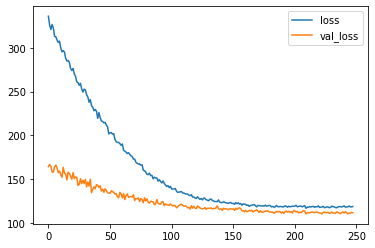

In [30]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [31]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)


,Predict,Actual
0,52.154774,54.0
1,48.635975,57.0
2,51.947353,38.0
3,56.424744,65.0
4,51.979038,42.0
5,51.884178,38.0
6,50.577961,55.0
7,54.795746,65.0
8,48.682568,53.0
9,51.543770,80.0


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test,predictions)


8.559261710030691

In [33]:
np.sqrt(mean_squared_error(y_test,predictions))


10.553580127151204